In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import get_data as gd
import numpy as np
import math

In [27]:
elem_durham_basic = gd.get_schl_info()
block_durham = gd.get_blk_info()
df_dist = gd.comp_dist(elem_durham_basic,block_durham)

In [28]:
strr = ""
for row in block_durham['BLKGRP']:
    strr = strr + row + ' '


block_strs = "370630001011   370630001012   370630001021   370630001022   370630002001   370630002002   370630002003   370630003011   370630003012   370630003013   370630003021   370630003022   370630003023   370630004011   370630004012   370630004013   370630004021   370630005001   370630005002   370630005003   370630005004   370630006001   370630006002   370630006003   370630007001   370630007002   370630007003   370630009001   370630009002   370630010011   370630010012   370630010013   370630010021   370630010022   370630010023   370630010024   370630011001   370630011002   370630013011   370630013031   370630013032   370630013041   370630014001   370630014002   370630015011   370630015021   370630015022   370630015023   370630015024   370630015031   370630016011   370630016012   370630016013   370630016031   370630016032   370630016033   370630016034   370630016041   370630016042   370630016043   370630017051   370630017052   370630017053   370630017061   370630017062   370630017071   370630017072   370630017073   370630017074   370630017075   370630017081   370630017091   370630017092   370630017093   370630017101   370630017102   370630017111   370630017112   370630017113   370630018011   370630018012   370630018013   370630018014   370630018015   370630018021   370630018022   370630018023   370630018024   370630018061   370630018062   370630018071   370630018072   370630018073   370630018081   370630018082   370630018091   370630018092   370630019001   370630019002   370630020071   370630020072   370630020073   370630020081   370630020082   370630020091   370630020092   370630020093   370630020131   370630020132   370630020133   370630020151   370630020152   370630020153   370630020161   370630020162   370630020171   370630020172   370630020173   370630020181   370630020182   370630020183   370630020191   370630020192   370630020193   370630020201   370630020202   370630020211   370630020212   370630020221   370630020222   370630020231   370630020232   370630020241   370630020242   370630020243   370630020251   370630020252   370630020253   370630020261   370630020262   370630020271   370630020272   370630020273   370630020281   370630020282   370630020283   370630021001   370630021002   370630021003   370630022001   370630023001   370630023002   370639801001"
blocks = block_strs.split()
dic_prop = {}
for blk in blocks:
    for idx, row in block_durham.iterrows():
        if row['BLKGRP']!=blk:
            continue
        tmp = []
        tmp.append(int(row['Total_W']*10+0.5)/10)
        tmp.append(int(row['Total_A']*10+0.5)/10)
        tmp.append(int(row['Total_M']*10+0.5)/10)
        tmp.append(int(row['Total_H']*10+0.5)/10)
        tmp.append(int(row['Total_B']*10+0.5)/10)
        dic_prop[blk] = tmp
        break

schs = "Creekside   Easley   Eastway   Hope   Bethesda   Holt   Hillandale   Mangum   Glenn   Eno   Merrick-Moore   Oak   Y.E.   E.K.   Forest   Lakewood   Little   C.C.   Fayetteville   Southwest   Parkwood   W.G.   Spring".split()

sch_dic = {}
for sc in schs:
    sch_dic[sc] = [0]*5

In [31]:
import collections
f = open('results2.txt','r')
it = 0
school_to_blk = collections.defaultdict(list)
block_durham = block_durham.set_index('BLKGRP')
for line in f:
#     line = f.readline().split('=')
    #
    l = line.split('=')
    gts = l[1][1]
    
    if gts=='0':
         continue
    coord = l[0][l[0].index('[')+1:l[0].index(']')].split(",")
    block_durham.at[str(coord[0]),'school'+coord[2]] = coord[1]
    if coord[2]=='W':
        sch_dic[coord[1]][0]+=dic_prop[coord[0]][0]
    elif coord[2]=='A':
        sch_dic[coord[1]][1]+=dic_prop[coord[0]][1]
    elif coord[2]=='M':
        sch_dic[coord[1]][2]+=dic_prop[coord[0]][2]
    elif coord[2]=='H':
        sch_dic[coord[1]][3]+=dic_prop[coord[0]][3]
    elif coord[2]=='B':
        sch_dic[coord[1]][4]+=dic_prop[coord[0]][4]
    it+=1
block_durham = block_durham.dropna(subset = ['schoolW'])

765
{'Creekside': [937.8000000000001, 59.00000000000001, 78.19999999999999, 60.400000000000006, 260.0], 'Easley': [300.79999999999995, 2.4, 3.6, 200.0, 520.8000000000001], 'Eastway': [151.0, 0, 4.4, 220.60000000000002, 534.2], 'Hope': [330.6, 7.6, 0, 234.4, 559.8], 'Bethesda': [145.0, 23.4, 57.400000000000006, 138.2, 647.4], 'Holt': [211.39999999999998, 16.2, 67.6, 282.59999999999997, 410.40000000000003], 'Hillandale': [571.0, 66.6, 59.6, 174.79999999999998, 132.8], 'Mangum': [610.8, 10.6, 0, 2.4, 72.60000000000001], 'Glenn': [112.8, 11.399999999999999, 62.0, 453.4, 482.80000000000007], 'Eno': [547.0, 14.8, 11.0, 126.0, 327.8], 'Merrick-Moore': [266.59999999999997, 9.8, 25.400000000000002, 17.6, 763.0], 'Oak': [227.2, 6.6000000000000005, 8.4, 75.60000000000001, 447.2], 'Y.E.': [7.4, 10.0, 35.2, 467.20000000000005, 37.4], 'E.K.': [396.00000000000006, 28.4, 83.19999999999999, 149.4, 26.599999999999998], 'Forest': [511.40000000000003, 9.8, 5.2, 256.8, 212.8], 'Lakewood': [47.1999999999999

In [32]:
try:
    df_dist = df_dist.set_index('BLKGRP')
except:
    print(" no need to rest")
    

races = ['W','A','B','M','H']

for race in races:
    block_durham['distance'+race] = 0
    for index, row in block_durham.iterrows():
        school = row['school'+race]
        sch_name = list(df_dist.filter(regex = school+".*"))
        block_durham.loc[str(index),'distance'+race] = float(df_dist.loc[str(index),sch_name])


districtW = block_durham.dissolve(by='schoolW').reset_index()
districtB = block_durham.dissolve(by='schoolB').reset_index()
districtA = block_durham.dissolve(by='schoolA').reset_index()
districtH = block_durham.dissolve(by='schoolH').reset_index()
districtM = block_durham.dissolve(by='schoolM').reset_index()

## Plot the result as pie chart

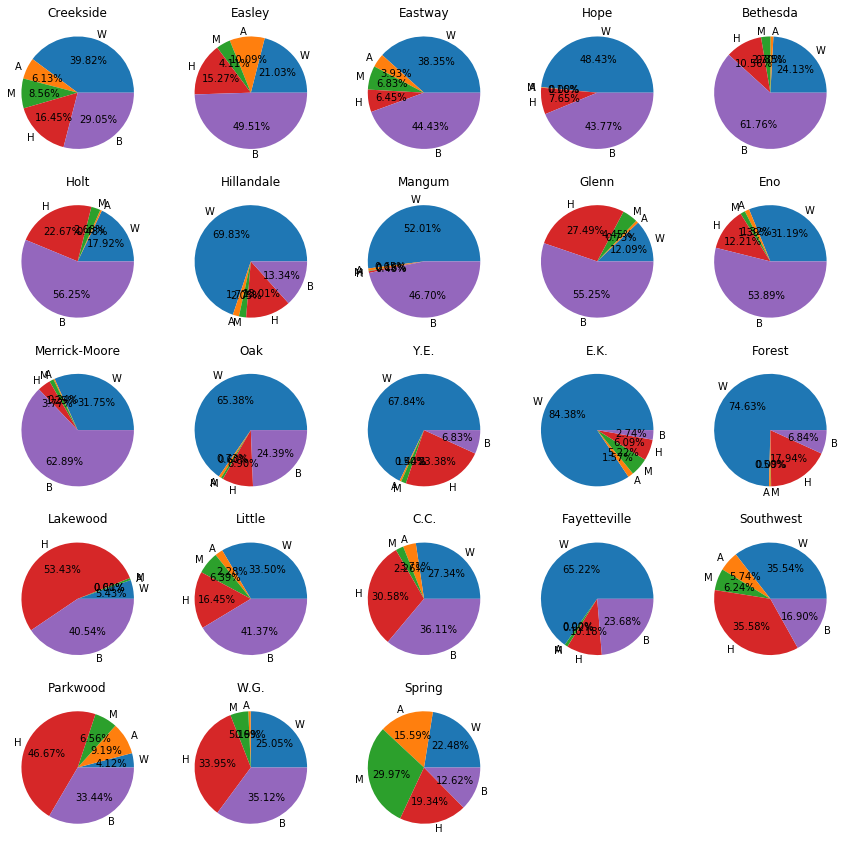

In [69]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(1, figsize=(15,15))
count = 1
labels=['W','A','M','H','B']
for sch in sch_dic:
    plt.subplot(5, 5, count)
    plt.pie(sch_dic[sch],labels=labels,autopct='%1.2f%%')
    plt.title(sch)
    count+=1
plt.show()

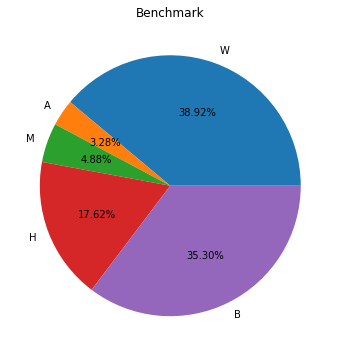

In [70]:
X = [0.3892, 0.0328, 0.0488, 0.1762, 0.3530]
plt.figure(1, figsize=(6,6))
plt.pie(X,labels=labels,autopct='%1.2f%%')
plt.title("Benchmark")
plt.show()

## Analyze Fairness

In [67]:
def calc_dist(x1,y1, x2,y2):
    return (x1-x2)**2 + (y1-y2)**2

In [71]:
calc_dist(35.931643, -79.053487,36.001137, -78.939952)

0.017719612260999572

(array([20.,  8., 12., 13.,  9., 15., 10., 13., 10.,  8.,  4.,  4.,  2.,
         3.,  0.,  4.,  1.,  4.,  2.,  2.,  1.,  3.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.04262954e-05, 3.49291167e-04, 6.58156038e-04, 9.67020910e-04,
        1.27588578e-03, 1.58475065e-03, 1.89361552e-03, 2.20248040e-03,
        2.51134527e-03, 2.82021014e-03, 3.12907501e-03, 3.43793988e-03,
        3.74680475e-03, 4.05566962e-03, 4.36453450e-03, 4.67339937e-03,
        4.98226424e-03, 5.29112911e-03, 5.59999398e-03, 5.90885885e-03,
        6.21772373e-03, 6.52658860e-03, 6.83545347e-03, 7.14431834e-03,
        7.45318321e-03, 7.76204808e-03, 8.07091295e-03, 8.37977783e-03,
        8.68864270e-03, 8.99750757e-03, 9.30637244e-03, 9.61523731e-03,
        9.92410218e-03, 1.02329671e-02, 1.05418319e-02, 1.08506968e-02,
        1.11595617e-02, 1.14684265e-02, 1.17772914e-02, 1.20861563e-

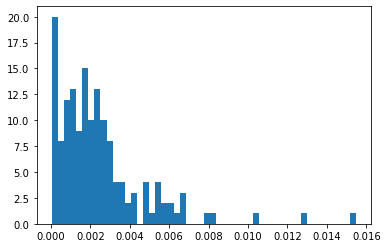

In [72]:
plt.hist(dist_dict['A'], bins= 50)

In [64]:
from collections import defaultdict
avg_dist_dict = defaultdict(float)
for race in races:
    dist_dict[race] = np.array(block_durham['distance'+race])
    avg_dist_dict[race] = np.array(block_durham['distance'+race]).mean()


## Template for plt a geopandas doc

In [ ]:


# ig, ax = plt.subplots(1, 1,figsize=(25, 25))
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.set_title("Durham Public Elementary School Districts for Multiracial students",fontsize = 28)
# #elem_durham.plot(ax = ax, legend = True, column = 'Pct_H',cmap = 'YlOrRd')
# #elem_durham.plot(ax = ax, legend = True,cmap = 'YlOrRd')
# districtM['coords'] = districtM['geometry'].apply(lambda x: x.representative_point().coords[:])
# districtM['coords'] = [coords[0] for coords in districtM['coords']]
# districtM.geometry.boundary.plot(color = None, edgecolor = 'r',linewidth = 1, ax = ax, vmin = 0, vmax = 1)
# for idx, row in districtM.iterrows():
#     plt.annotate(s=row['schoolM'], xy=row['coords'],
#                  horizontalalignment='center', fontsize = 16)